In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
means = 10,20

In [50]:
stdevs = 4,2

In [51]:
normal_dist = np.random.normal(loc = means, scale = stdevs, 
                size = (1000,2))

In [52]:
dist = pd.DataFrame(normal_dist, columns=['a','b'])

In [53]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b
min,-1.83,13.93
max,21.42,27.57
mean,9.88,20.17
std,4.02,1.91


<AxesSubplot:title={'center':'Histogram: A vs. B'}, ylabel='Frequency'>

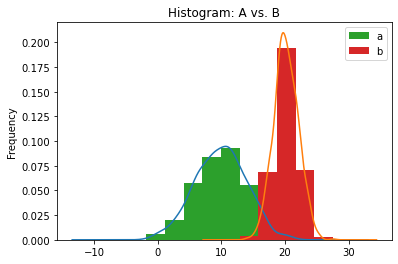

In [59]:
fig, ax = plt.subplots()
dist.plot.kde( ax = ax, legend=False, title='Histogram: A vs. B')

dist.plot.hist(density = True, ax = ax)

In [64]:
dist = stats.norm()


In [65]:
samp = dist.rvs(size = 1000)
samp.shape

(1000,)

In [66]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99), num = 250)

In [67]:
gkde = stats.gaussian_kde(dataset= samp)
gkde

Text(-2.0, 0.35, '$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

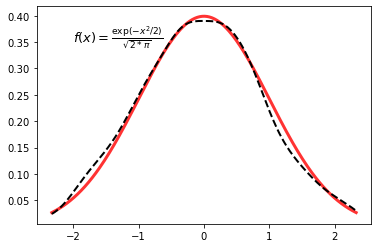

In [71]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')

ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=13)